# Realistic DCA

## Steps

1. Load in the image and the mask
2. Apply mask to clean image
3. Get Gaussian Blur of masked image
4. Retrieve center point and radius of circle in the mask and reduce by more pixels
        perhaps before masking could increase by a few pixels instead to save image data?
5. use where clause to concatenate the blurred image to the original

In [1]:
# append custom system path for custom modules folder in directory if not already
import sys
if  '../../Modules' not in sys.path:
    sys.path.insert(0, '../../Modules')
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import Image
import realistic_dca

[[  8 113]
 [  9  99]
 [  9 100]
 ...
 [207 126]
 [207 127]
 [208 113]]


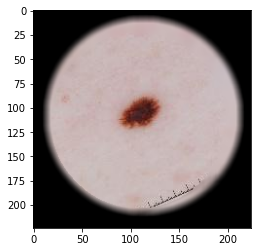

In [2]:
img_name = "ISIC2019_0012099_downsampled_mel"

orig_image = cv2.imread(r"..\\..\\Data\\dca_split_unbalanced_224x224\\train\\" + img_name[-3:] + "\\" + img_name + ".jpg")
orig_image = cv2.cvtColor(orig_image, cv2.COLOR_BGR2RGB)



# load mask
#mask = cv2.imread(r"D:\OneDrive - MMU\Complete_Final_Project\Lesion_Classification\Data\DCA_Masks\train\mel\ISIC2019_0000004_mel_MASK.png")
mask = cv2.imread(r"D:\OneDrive - MMU\Complete_Final_Project\Lesion_Classification\Data\DCA_Masks\train\mel\ISIC2019_0000290_mel_MASK.png")
mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)

masked_image = orig_image.copy()
masked_image[mask.astype(bool)] = 0


#mask_copy = np.copy(mask)
#mask_copy = cv2.cvtColor(mask_copy, cv2.COLOR_BGR2GRAY)
#contours, hierarchy = cv2.findContours(mask_copy, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
#img_contours = np.zeros(mask.shape)
#plt.imshow((cv2.drawContours(img_contours, contours[1], -1, (0,255,0), 3)).astype(np.uint8));
#
#(x,y), radius = cv2.minEnclosingCircle(contours[1])
#
#center = (int(x), int(y))

mask2 = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
coords = np.column_stack(np.where(mask2 < 1))
print(coords)
(x,y), radius = cv2.minEnclosingCircle(coords)
center = (int(x), int(y))


# create the new masking circle using the centre point and the new radius
#this_contour = cv2.circle(np.ones(orig_image.shape),center,radius,(0,0,0),-1)

radius = int(radius) - 10

# create the new masking circle using the centre point and the new radius
this_contour = cv2.circle(np.ones(mask.shape),center,radius,(0,0,0),-1)




blurred_img = cv2.GaussianBlur(src = masked_image, ksize = (9, 9), sigmaX = 20,sigmaY = 20, borderType = cv2.BORDER_DEFAULT)

output = np.where(this_contour!=np.array([0, 0, 0]), blurred_img, orig_image)
#eroded_img = cv2.erode(output, (200,200))

plt.imshow(output)


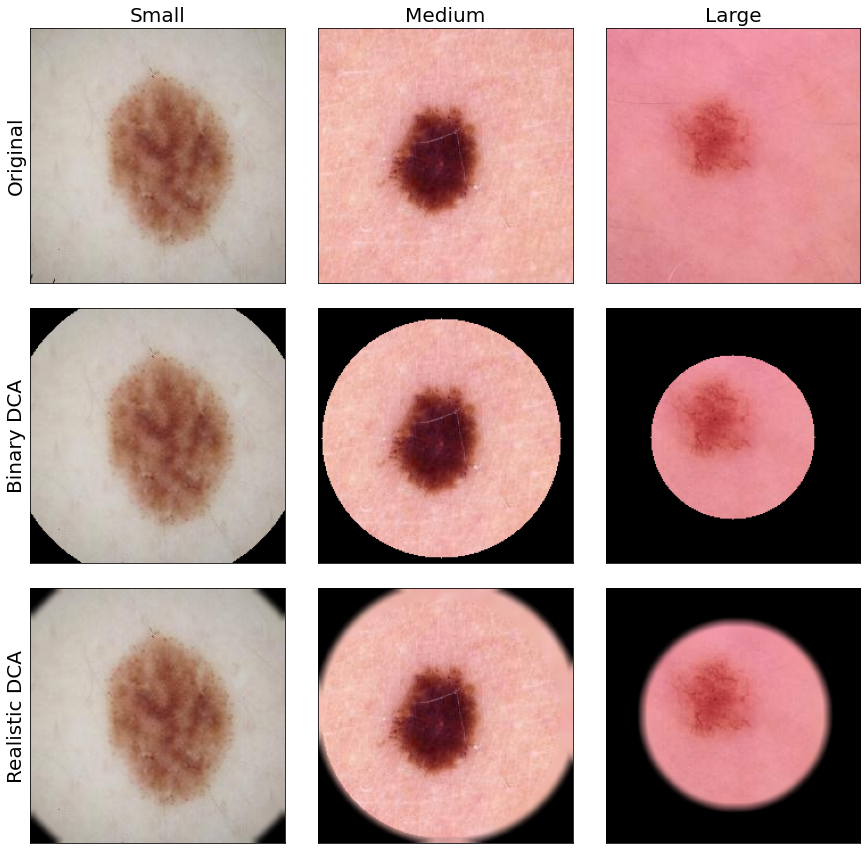

In [28]:


# load images
first = "ISIC2019_0009966_oth"
second = "ISIC2019_0025779_oth"
third = "ISIC2019_0026906_oth"

first_image = cv2.imread(r"..\\..\\Data\\dca_split_unbalanced_224x224\\train\\" + first[-3:] + "\\" + first + ".jpg")
first_image = cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB)

second_image = cv2.imread(r"..\\..\\Data\\dca_split_unbalanced_224x224\\train\\" + second[-3:] + "\\" + second + ".jpg")
second_image = cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB)

third_image = cv2.imread(r"..\\..\\Data\\dca_split_unbalanced_224x224\\train\\" + third[-3:] + "\\" + third + ".jpg")
third_image = cv2.cvtColor(third_image, cv2.COLOR_BGR2RGB)

# load masks
large_m = cv2.imread(r"D:\OneDrive - MMU\Complete_Final_Project\Lesion_Classification\Data\DCA_Masks\train\mel\ISIC2019_0053531_mel_MASK.png")
large_m = cv2.cvtColor(large_m, cv2.COLOR_BGR2RGB)

medium_m = cv2.imread(r"D:\OneDrive - MMU\Complete_Final_Project\Lesion_Classification\Data\DCA_Masks\train\mel\ISIC2019_0053751_mel_MASK.png")
medium_m = cv2.cvtColor(medium_m, cv2.COLOR_BGR2RGB)

small_m = cv2.imread(r"D:\OneDrive - MMU\Complete_Final_Project\Lesion_Classification\Data\DCA_Masks\train\mel\ISIC2019_0053801_mel_MASK.png")
small_m = cv2.cvtColor(small_m, cv2.COLOR_BGR2RGB)

output_s = realistic_dca.augment_dca(first_image, small_m)
output_m = realistic_dca.augment_dca(second_image, medium_m)
output_l = realistic_dca.augment_dca(third_image, large_m)

binary_s = realistic_dca.augment_binary_dca(first_image, small_m)
binary_m = realistic_dca.augment_binary_dca(second_image, medium_m)
binary_l = realistic_dca.augment_binary_dca(third_image, large_m)

fig, axes = plt.subplots(3,3, figsize=(15,15));

axes[0][0].imshow(first_image)
axes[0][0].set_title("Small", size=20)
axes[0][1].imshow(second_image)
axes[0][1].set_title("Medium", size=20)
axes[0][2].imshow(third_image)
axes[0][2].set_title("Large", size=20)

axes[1][0].imshow(binary_s)
axes[1][1].imshow(binary_m)
axes[1][2].imshow(binary_l)

axes[2][0].imshow(output_s)
axes[2][1].imshow(output_m)
axes[2][2].imshow(output_l)

axes[0][0].set_ylabel("Original", size=20)
axes[1][0].set_ylabel("Binary DCA", size=20)
axes[2][0].set_ylabel("Realistic DCA", size=20)

for row in axes:
    for ax in row:
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        ax.set_xticks([])
        ax.set_yticks([])
        
plt.subplots_adjust(wspace=0.1, hspace = 0.1)

fig.savefig(r"D:\OneDrive - MMU\Journal_Project\temp\augmented_dca.png")